In [1]:
!pip install pmdarima --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.7 MB/s eta 0:00:0000:01


In [2]:
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import pickle

with open('/kaggle/input/electricity-data/region_data.pkl', 'rb') as f:
    data = pickle.load(f)

data = data['AZPS']

data = data[(data['type'] == 'D') & (data['respondent'] == 'AZPS') & (data['timezone'] == 'Central')]
data.shape

(731, 53)

/tmp/ipykernel_35/3587541606.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


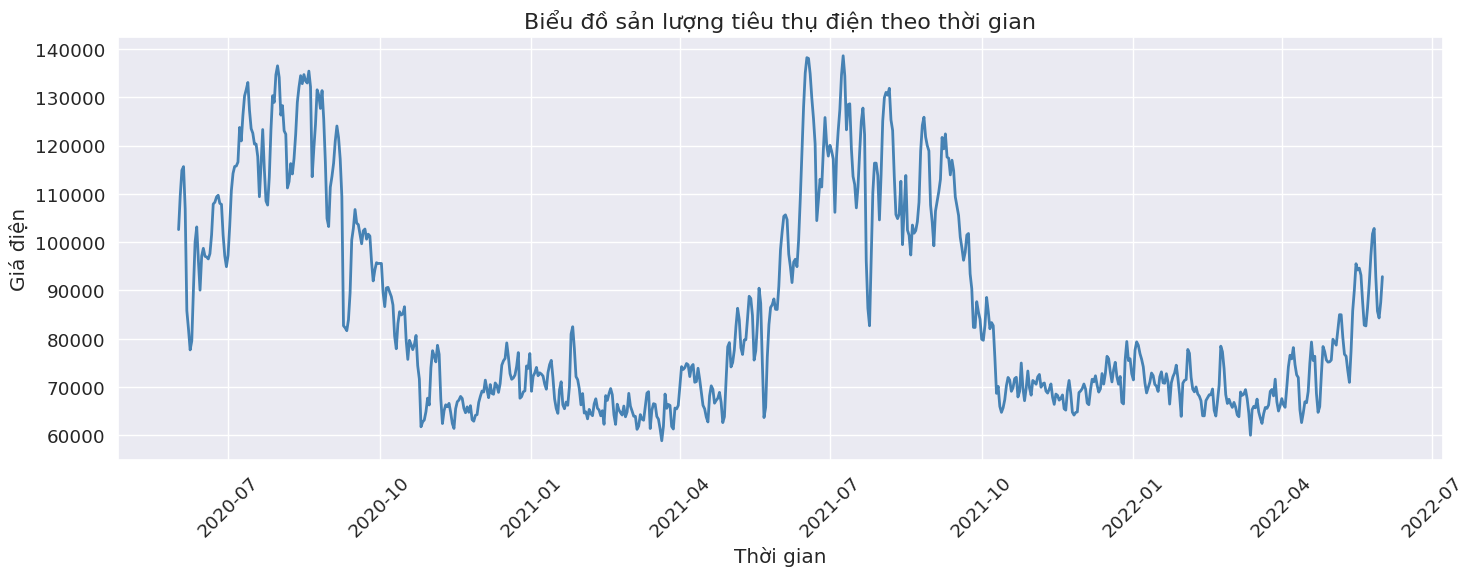

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị đẹp hơn
plt.style.use('seaborn-darkgrid')
sns.set(font_scale=1.2)

# Giả sử cột 'value' là giá điện và 'date' là cột thời gian
# Nếu index là datetime thì dùng luôn df.index
plt.figure(figsize=(15, 6))
plt.plot(df.index, data['value'], color='steelblue', linewidth=2)

plt.title('Biểu đồ sản lượng tiêu thụ điện theo thời gian', fontsize=16)
plt.xlabel('Thời gian')
plt.ylabel('Giá điện')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
data.iloc[0]

period                                       2020-06-01
respondent                                          AEC
respondent-name           PowerSouth Energy Cooperative
type                                                  D
type-name                                        Demand
timezone                                        Central
timezone-description                            Central
value                                             14023
value-units                               megawatthours
year                                               2020
month                                                 6
day                                                   1
day_of_week                                           0
day_of_year                                         153
week_of_year                                         23
is_weekend                                            0
quarter                                               2
month_day                                       

In [6]:

df = data

# Chuyển sang datetime
df['date'] = pd.to_datetime(df['period'])

# Sắp xếp theo thời gian
df = df.sort_values('date')

# Đưa về index nếu bạn muốn tiện
df = df.set_index('date')

In [7]:
df.columns

Index(['period', 'respondent', 'respondent-name', 'type', 'type-name',
       'timezone', 'timezone-description', 'value', 'value-units', 'year',
       'month', 'day', 'day_of_week', 'day_of_year', 'week_of_year',
       'is_weekend', 'quarter', 'month_day', 'season', 'is_holiday',
       'is_business_day', 'demand_lag_1d', 'demand_lag_7d', 'demand_lag_30d',
       'demand_lag_365d', 'demand_ma_7d', 'demand_ma_30d', 'demand_ma_90d',
       'demand_trend_7d', 'demand_trend_30d', 'demand_growth_rate_7d',
       'demand_growth_rate_30d', 'demand_yoy_change', 'demand_yoy_growth',
       'demand_std_30d', 'demand_max_30d', 'demand_min_30d',
       'demand_volatility_30d', 'day_of_week_sin', 'day_of_week_cos',
       'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'COL',
       'NG', 'NUC', 'OIL', 'OTH', 'SUN', 'WAT', 'WND'],
      dtype='object')

In [32]:
X_train.iloc[1]

COL                            16709.0
NG                             74444.0
OTH                              515.0
SUN                                0.0
WAT                               41.0
day_of_week                          1
is_weekend                           0
season                          Summer
is_holiday                           0
is_business_day                      1
demand_lag_1d                  13074.0
demand_lag_7d                      NaN
demand_lag_30d                     NaN
demand_lag_365d                    NaN
demand_ma_7d              13807.571429
demand_ma_30d             13807.571429
demand_ma_90d             13807.571429
demand_trend_7d                    NaN
demand_trend_30d                   NaN
demand_growth_rate_7d              0.0
demand_growth_rate_30d             0.0
demand_yoy_change                  NaN
demand_yoy_growth                  0.0
demand_std_30d              474.358464
demand_max_30d                 14161.0
demand_min_30d           

In [8]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [9]:
# adf_results = []

# def Augmented_Dickey_Fuller_Test_func(series, column_name):
#     dftest = adfuller(series.dropna(), autolag='AIC')
    
#     result_dict = {
#         'Biến': column_name,
#         'Test Statistic': round(dftest[0], 4),
#         'p-value': round(dftest[1], 4),
#         'Lags Used': dftest[2],
#         'Số quan sát': dftest[3],
#         'CV 1%': round(dftest[4]['1%'], 4),
#         'CV 5%': round(dftest[4]['5%'], 4),
#         'CV 10%': round(dftest[4]['10%'], 4),
#         'Tính dừng': 'Có' if dftest[1] <= 0.05 else 'Không'
#     }
#     adf_results.append(result_dict)

In [14]:
test= df.loc['2021-06-01':'2021-06-30']
for name, column in test[['COL', 'NG', 'OTH', 'WAT','day_of_week',
       'is_weekend', 'is_holiday',
       'is_business_day', 'demand_lag_1d' , 'demand_ma_7d', 'demand_ma_30d', 'demand_ma_90d',
        'demand_growth_rate_7d',
       'demand_growth_rate_30d', 'demand_yoy_growth',
       'demand_std_30d', 'demand_max_30d', 'demand_min_30d',
       'demand_volatility_30d']].items():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: COL
Test Statistic                  -3.865188
p-value                          0.002307
No Lags Used                     8.000000
Number of Observations Used    722.000000
Critical Value (1%)             -3.439440
Critical Value (5%)             -2.865551
Critical Value (10%)            -2.568906
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: NG
Test Statistic                  -2.977495
p-value                          0.037050
No Lags Used                     9.000000
Number of Observations Used    721.000000
Critical Value (1%)             -3.439452
Critical Value (5%)             -2.865557
Critical Value (10%)            -2.568909
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: OTH
Test Statistic                -1.007295e+01
p-value                        1.245014e-17
No Lags Used               

ValueError: Invalid input, x is constant

In [32]:
df_adf = pd.DataFrame(adf_results)
display(df_adf)  # Xem trực tiếp nếu Jupyter

# Xuất ra file báo cáo
df_adf.to_csv('ADF_Test_Results.csv', index=False)

,Biến,Test Statistic,p-value,Lags Used,Số quan sát,CV 1%,CV 5%,CV 10%,Tính dừng
0,COL,-2.273900e+00,0.1805,18,438,-3.4454,-2.8682,-2.5703,Không
1,NG,-3.709800e+00,0.0040,5,451,-3.4449,-2.8680,-2.5702,Có
2,OTH,-4.113100e+00,0.0009,5,451,-3.4449,-2.8680,-2.5702,Có
3,WAT,-8.177200e+00,0.0000,3,453,-3.4449,-2.8679,-2.5702,Có
4,day_of_week,-1.369708e+15,0.0000,8,448,-3.4450,-2.8680,-2.5702,Có
5,is_weekend,-7.589484e+15,0.0000,17,439,-3.4453,-2.8681,-2.5703,Có
6,is_holiday,-2.169120e+01,0.0000,0,456,-3.4448,-2.8679,-2.5702,Có
7,is_business_day,-4.355000e+00,0.0004,14,442,-3.4452,-2.8681,-2.5703,Có
8,demand_lag_1d,-2.170500e+00,0.2171,12,444,-3.4452,-2.8681,-2.5702,Không
9,demand_ma_7d,-2.033100e+00,0.2722,12,444,-3.4452,-2.8681,-2.5702,Không


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Bước 1: Lọc dữ liệu theo thời gian
train = df.loc['2021-04-01':'2021-06-30']
test = df.loc['2021-07-01':'2021-07-30']

# Bước 2: Fillna đơn giản (có thể thay đổi chiến lược nếu cần)
train = train.fillna(method='ffill').dropna()
test = test.fillna(method='ffill').dropna()
print(train.shape)
# Bước 3: Tách biến
exogenous_features = ['NG', 'OTH', 'WAT',
                      'demand_growth_rate_7d', 'demand_growth_rate_30d',
                      'demand_std_30d', 'demand_volatility_30d',
                      'day_of_week', 'is_weekend', 'is_holiday', 'is_business_day']

X_train = train[exogenous_features].copy()
Y_train = train['value'].copy()

X_test = test[exogenous_features].copy()
Y_test = test['value'].copy()

# Bước 4: Khởi tạo scaler riêng cho value và feature
scaler_value = MinMaxScaler()
scaler_exo = MinMaxScaler()

# Bước 5: Scale dữ liệu
# Y_train_scaled = scaler_value.fit_transform(Y_train.values.reshape(-1, 1)).flatten()
# Y_test_scaled = scaler_value.transform(Y_test.values.reshape(-1, 1)).flatten()

X_train_scaled = scaler_exo.fit_transform(X_train)
X_test_scaled = scaler_exo.transform(X_test)

# Bước 6: Lưu kết quả
actualtrain = Y_train_scaled
exotrain = X_train_scaled
actualtest = Y_test_scaled
exotest = X_test_scaled


(91, 52)


/tmp/ipykernel_35/2109153154.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train = train.fillna(method='ffill').dropna()
/tmp/ipykernel_35/2109153154.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test = test.fillna(method='ffill').dropna()


In [17]:
Y_test.shape

(30,)

 Fitting SARIMAX for Seasonal value m = 1
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-138.760, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-136.829, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-136.893, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-140.564, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.391 seconds
Model summary for  m = 1
----------------------------------------------------------------------------------------------------
(30,)
(30, 1)
Evaluation metric results:-
MAE is : 0.1682573701004906
RMSE is : 0.22122654198034214
MAPE is : 18.725601522244954
R2 is : -0.29619961078079626



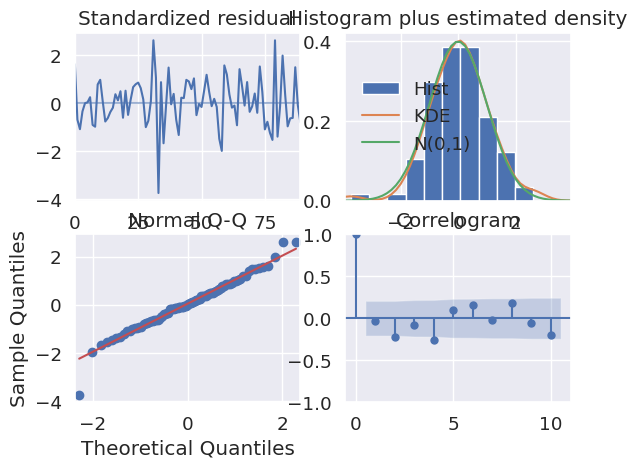

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 4
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=-144.516, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-138.760, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-141.430, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-140.149, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-140.564, Time=0.01 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(2,0,1)[4] intercept   : AIC=-143.029, Time=0.58 sec
 ARIMA(1,1,1)(1,0,2)[4] intercept   : AIC=-143.983, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,2)[4] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,1)(2,0,0)[4] intercept   : AIC=-145.911, Time=0.50 sec
 ARIMA(1,1,1)(3,0,0)[4] intercept   : AIC=

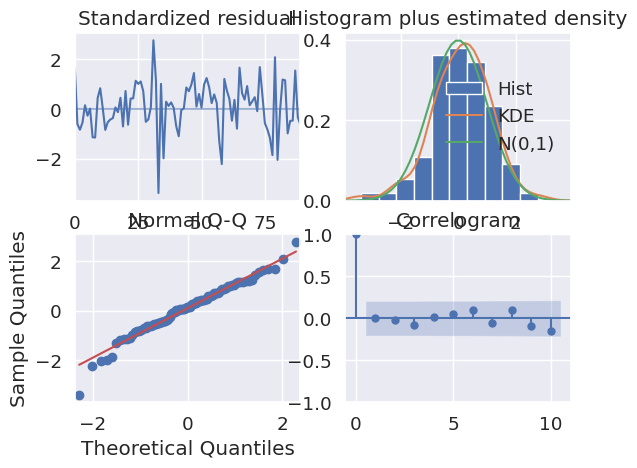

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 7
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.88 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-138.760, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-134.834, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-134.893, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-140.564, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-136.784, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-136.777, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-136.829, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-136.893, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 4.073 seconds
Model summary for  m = 7
-

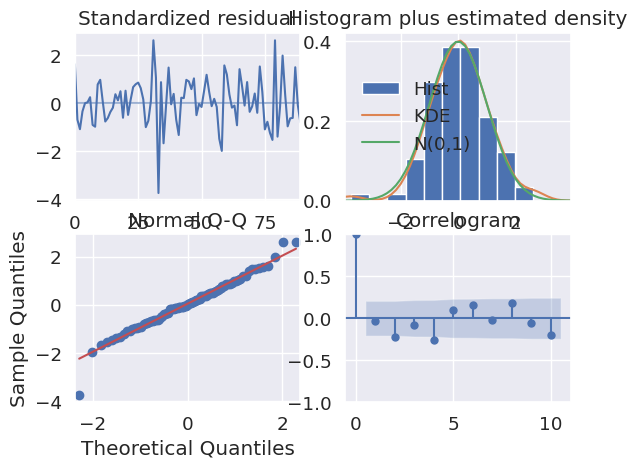

----------------------------------------------------------------------------------------------------


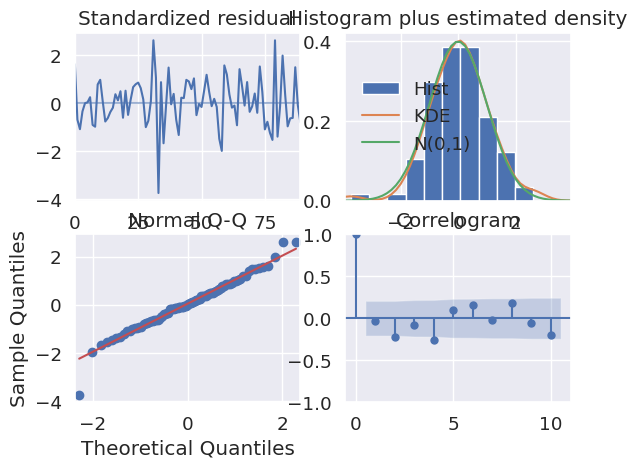

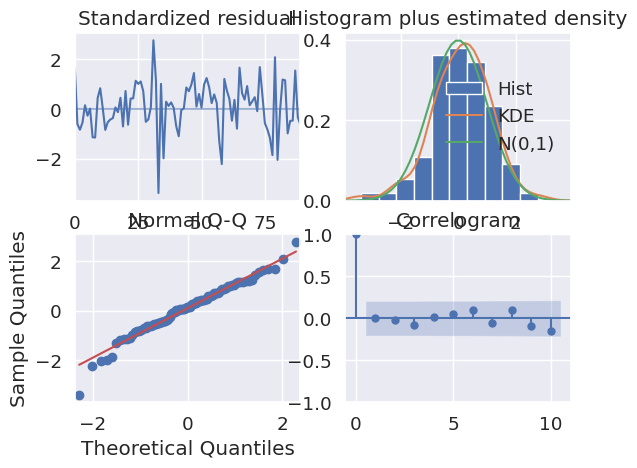

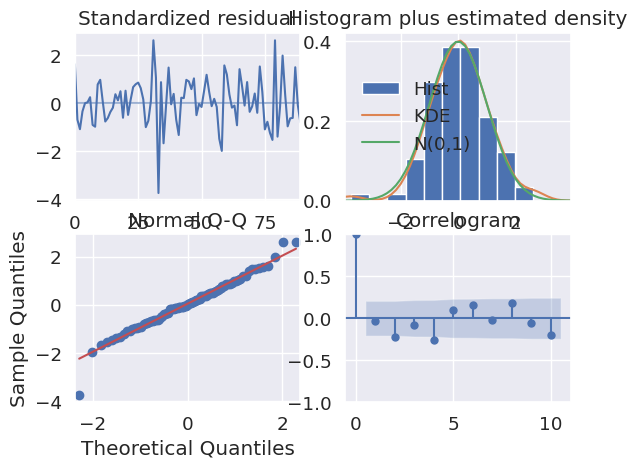

In [24]:
from sklearn import metrics
import numpy as np
for m in [1,4,7]:
    print("="*100)
    print(f' Fitting SARIMAX for Seasonal value m = {str(m)}')
    stepwise_model =  pm.auto_arima(actualtrain,exogenous =exotrain ,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=True,start_P=1,start_Q=1,max_P=7,max_D=7,max_Q=7,m=m,
    d=None,D=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast,conf_int = stepwise_model.predict(n_periods=30,exogenous =exotest,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1229, 1259)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1229, 1259)
    forecast = forecast.set_index("new_index")
    print(actualtest.shape)
    print(forecast.shape)
    timeseries_evaluation_metrics_func(actualtest, forecast)
    display(stepwise_model.plot_diagnostics());
    print("-"*100)